In [ ]:
#Kinzang Dorji (12190061)
#Kushal Chhetri (12190064)
#Phuntsho Dorji (12190070)

In [587]:
import numpy as np
import pandas as pd


In [588]:
df = pd.read_csv('adult.data' , names = ['age','workclass','fnlwgt','education','education_num','marital_status','occupation','relationship','race','sex','capital_gain','capital_loss','hours_per_week','native_country','income'])
df.head()

age          workclass  fnlwgt   education  education_num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital_status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital_gain  capital_loss  hours_per_week  native_country  income  
0          2174             0              40   United-States   <=50K  
1             0             0              13   United-States   <=50K  
2             0             0              40   United-States   <=50K  
3             0             0              40   United-States   <=50K  
4             0             0              40            Cuba   <=50K

In [589]:
df.shape

(32561, 15)

In [590]:
df['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [591]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [592]:
df['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [593]:
df['workclass'] = df['workclass'].replace(" ?", df.workclass.mode)
df['occupation'] = df['occupation'].replace(" ?", df.occupation.mode)
df['native_country'] = df['native_country'].replace(" ?", df.native_country.mode)

In [594]:
df['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov',
       <bound method Series.mode of 0                State-gov
       1         Self-emp-not-inc
       2                  Private
       3                  Private
       4                  Private
                      ...
       32556              Private
       32557              Private
       32558              Private
       32559              Private
       32560         Self-emp-inc
       Name: workclass, Length: 32561, dtype: object>         ,
       ' Self-emp-inc', ' Without-pay', ' Never-worked'], dtype=object)

In [595]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [596]:
df['occupation'].unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support',
       <bound method Series.mode of 0              Adm-clerical
       1           Exec-managerial
       2         Handlers-cleaners
       3         Handlers-cleaners
       4            Prof-specialty
                       ...
       32556          Tech-support
       32557     Machine-op-inspct
       32558          Adm-clerical
       32559          Adm-clerical
       32560       Exec-managerial
       Name: occupation, Length: 32561, dtype: object>         ,
       ' Protective-serv', ' Armed-Forces', ' Priv-house-serv'],
      dtype=object)

In [597]:
print("Duplicate values present:", df.duplicated().sum())

Duplicate values present: 24


In [598]:
df=df.drop_duplicates()

In [599]:
print("Duplicate values present:", df.duplicated().any())

Duplicate values present: False


In [600]:
df.shape

(32537, 15)

In [601]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [602]:
df.describe

<bound method NDFrame.describe of        age          workclass  fnlwgt    education  education_num  \
0       39          State-gov   77516    Bachelors             13   
1       50   Self-emp-not-inc   83311    Bachelors             13   
2       38            Private  215646      HS-grad              9   
3       53            Private  234721         11th              7   
4       28            Private  338409    Bachelors             13   
...    ...                ...     ...          ...            ...   
32556   27            Private  257302   Assoc-acdm             12   
32557   40            Private  154374      HS-grad              9   
32558   58            Private  151910      HS-grad              9   
32559   22            Private  201490      HS-grad              9   
32560   52       Self-emp-inc  287927      HS-grad              9   

            marital_status          occupation    relationship    race  \
0            Never-married        Adm-clerical   Not-in-family 

In [603]:
categorical_features = df.select_dtypes(include = 'object')
numerical_features = df.select_dtypes(exclude = 'object')

categorical_features.head()

workclass   education       marital_status          occupation  \
0          State-gov   Bachelors        Never-married        Adm-clerical   
1   Self-emp-not-inc   Bachelors   Married-civ-spouse     Exec-managerial   
2            Private     HS-grad             Divorced   Handlers-cleaners   
3            Private        11th   Married-civ-spouse   Handlers-cleaners   
4            Private   Bachelors   Married-civ-spouse      Prof-specialty   

     relationship    race      sex  native_country  income  
0   Not-in-family   White     Male   United-States   <=50K  
1         Husband   White     Male   United-States   <=50K  
2   Not-in-family   White     Male   United-States   <=50K  
3         Husband   Black     Male   United-States   <=50K  
4            Wife   Black   Female            Cuba   <=50K

In [604]:
numerical_features.head()

age  fnlwgt  education_num  capital_gain  capital_loss  hours_per_week
0   39   77516             13          2174             0              40
1   50   83311             13             0             0              13
2   38  215646              9             0             0              40
3   53  234721              7             0             0              40
4   28  338409             13             0             0              40

In [605]:
32561#Encoding Categorical data
from sklearn.preprocessing import OrdinalEncoder
oe =  OrdinalEncoder()
categorical_features['workclass'] = oe.fit_transform(categorical_features[['workclass']].astype(str))
categorical_features['education'] = oe.fit_transform(categorical_features[['education']].astype(str))
categorical_features['marital_status'] = oe.fit_transform(categorical_features[['marital_status']].astype(str))
categorical_features['occupation'] = oe.fit_transform(categorical_features[['occupation']].astype(str))
categorical_features['relationship'] = oe.fit_transform(categorical_features[['relationship']].astype(str))
categorical_features['race'] = oe.fit_transform(categorical_features[['race']].astype(str))
categorical_features['sex'] = oe.fit_transform(categorical_features[['sex']].astype(str))
categorical_features['native_country'] = oe.fit_transform(categorical_features[['native_country']].astype(str))


In [606]:
categorical_features.head()

workclass  education  marital_status  occupation  relationship  race  sex  \
0        6.0        9.0             4.0         0.0           1.0   4.0  1.0   
1        5.0        9.0             2.0         3.0           0.0   4.0  1.0   
2        3.0       11.0             0.0         5.0           1.0   4.0  1.0   
3        3.0        1.0             2.0         5.0           0.0   2.0  1.0   
4        3.0        9.0             2.0         9.0           5.0   2.0  0.0   

   native_country  income  
0            38.0   <=50K  
1            38.0   <=50K  
2            38.0   <=50K  
3            38.0   <=50K  
4             4.0   <=50K

In [607]:
from sklearn.preprocessing import LabelEncoder
le =  LabelEncoder()
categorical_features['income'] = le.fit_transform(categorical_features.income)
categorical_features.tail()

workclass  education  marital_status  occupation  relationship  race  \
32556        3.0        7.0             2.0        12.0           5.0   4.0   
32557        3.0       11.0             2.0         6.0           0.0   4.0   
32558        3.0       11.0             6.0         0.0           4.0   4.0   
32559        3.0       11.0             4.0         0.0           3.0   4.0   
32560        4.0       11.0             2.0         3.0           5.0   4.0   

       sex  native_country  income  
32556  0.0            38.0       0  
32557  1.0            38.0       1  
32558  0.0            38.0       0  
32559  1.0            38.0       0  
32560  0.0            38.0       1

In [608]:
y = categorical_features['income']
y

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: income, Length: 32537, dtype: int64

In [609]:
numerical_features.head()

age  fnlwgt  education_num  capital_gain  capital_loss  hours_per_week
0   39   77516             13          2174             0              40
1   50   83311             13             0             0              13
2   38  215646              9             0             0              40
3   53  234721              7             0             0              40
4   28  338409             13             0             0              40

In [610]:
concat = [categorical_features, numerical_features]

X = pd.concat(concat, axis=1)
X.head()

workclass  education  marital_status  occupation  relationship  race  sex  \
0        6.0        9.0             4.0         0.0           1.0   4.0  1.0   
1        5.0        9.0             2.0         3.0           0.0   4.0  1.0   
2        3.0       11.0             0.0         5.0           1.0   4.0  1.0   
3        3.0        1.0             2.0         5.0           0.0   2.0  1.0   
4        3.0        9.0             2.0         9.0           5.0   2.0  0.0   

   native_country  income  age  fnlwgt  education_num  capital_gain  \
0            38.0       0   39   77516             13          2174   
1            38.0       0   50   83311             13             0   
2            38.0       0   38  215646              9             0   
3            38.0       0   53  234721              7             0   
4             4.0       0   28  338409             13             0   

   capital_loss  hours_per_week  
0             0              40  
1             0              13  
2             0              40  
3             0              40  
4             0              40

In [611]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: income, dtype: int64

In [612]:
#scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
numeric = sc.fit_transform(X)

In [613]:
scaledX = pd.DataFrame(numeric,columns=X.columns)
scaledX.head()

workclass  education  marital_status  occupation  relationship      race  \
0   1.657724  -0.335266        0.921857   -1.483535     -0.277864  0.393685   
1   1.025828  -0.335266       -0.405919   -0.790564     -0.900126  0.393685   
2  -0.237964   0.181519       -1.733696   -0.328584     -0.277864  0.393685   
3  -0.237964  -2.402406       -0.405919   -0.328584     -0.900126 -1.962488   
4  -0.237964  -0.335266       -0.405919    0.595376      2.211186 -1.962488   

        sex  native_country    income       age    fnlwgt  education_num  \
0  0.703020        0.251146 -0.563377  0.030390 -1.063569       1.134777   
1  0.703020        0.251146 -0.563377  0.836973 -1.008668       1.134777   
2  0.703020        0.251146 -0.563377 -0.042936  0.245040      -0.420679   
3  0.703020        0.251146 -0.563377  1.056950  0.425752      -1.198407   
4 -1.422436       -5.340284 -0.563377 -0.776193  1.408066       1.134777   

   capital_gain  capital_loss  hours_per_week  
0      0.148292     -0.216743       -0.035664  
1     -0.145975     -0.216743       -2.222483  
2     -0.145975     -0.216743       -0.035664  
3     -0.145975     -0.216743       -0.035664  
4     -0.145975     -0.216743       -0.035664

In [614]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaledX,y,test_size=0.20,random_state=5, stratify = y, shuffle=True)

In [615]:
from sklearn.linear_model import LogisticRegression
l_model = LogisticRegression()
l_model.fit(X_train, y_train)
l_model.score(X_train, y_train)

1.0

In [616]:
y_pred = l_model.predict(X_test)

In [617]:
l_model.score(X_train, y_train)

1.0

In [618]:
l_model.score(X_test, y_test)

1.0

In [619]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4940
           1       1.00      1.00      1.00      1568

    accuracy                           1.00      6508
   macro avg       1.00      1.00      1.00      6508
weighted avg       1.00      1.00      1.00      6508



In [620]:
from sklearn.metrics import precision_score,recall_score

In [621]:
print(precision_score(y_test,y_pred,average='micro'))

1.0


In [622]:
print(recall_score(y_test,y_pred,average='micro'))

1.0


In [623]:
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y_test, y_pred)
cm1

array([[4940,    0],
       [   0, 1568]])

In [624]:
import matplotlib.pyplot as plt
import seaborn as sns

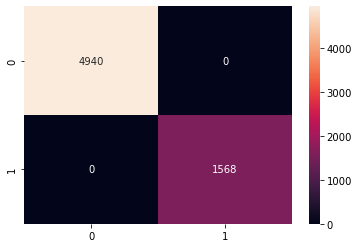

In [625]:
sns.heatmap(data=cm1,annot=True, fmt='d')
plt.show()

In [626]:
from sklearn.metrics import r2_score
Y_train_predicted = l_model.predict(X_train)
Y_test_predicted = l_model.predict(X_test)
print("Train set accuracy: ",r2_score(y_train,Y_train_predicted))
print("Test set accuracy : ",r2_score(y_test,Y_test_predicted))

Train set accuracy:  1.0
Test set accuracy :  1.0


In [627]:
Result = pd.DataFrame({"Actual income":y_test,"Predicted income":Y_test_predicted})
Result.head()

Actual income  Predicted income
31138              0                 0
17166              0                 0
3420               0                 0
9863               0                 0
15208              0                 0